# Practica.

Realizar la planificación y modelado de una simulacion basado en eventos discretos para identificar los contagios dentro de un establecimiento de estudiantes post COVID-19 para el reingreso de clases. Los pasos para el regreso progresivo a clases se describe a continuación:

- Calcular e Identificar el aforo máximo permitido en la institución educativa.
- Identificar el número de estudiantes y el porcentaje de contagio dentro del contexto poblacional el mismo que se aplicara dentro de la simulación por el contagio.
- Generar la simulación desde la puerta de ingreso y la salida del plantel por día.
- Los estudiantes hacen fila para ingresar al establecimiento y no pueden superar el aforo permitido.
- Realizar con un tiempo de un 1 mes.

Generar graficas que indiquen los estudiantes que presentaron complicaciones y el total de estudiantes por establecimiento en cada día o semana.

In [17]:
import simpy
import random
import matplotlib.pyplot as plt
from scipy import stats 


contagio=0.05
aforo=300
        # 6 horas al dia x 30 dias
tiempo = 360 * 38
dia=1
tiempoestadia=0

contagiosaldia={}

class Escuela(object):
    
    def __init__(self, environment, aforo):
        self.env=environment
        self.aforo = simpy.Resource(environment, aforo)

        
    def enclases(self):
        
        yield self.env.timeout(360) #6 horas
    





def llegada_estudiantes(env, escuela, contagio , dia):
    
    

    with escuela.aforo.request() as aforo:

        yield aforo
        contagiado = 0
        yield env.process(escuela.enclases())

        if tiempoestadia<=0 and tiempoestadia<60:

            bernoulli = stats.bernoulli(contagio)
            contagiado=bernoulli.rvs(1)

        elif tiempoestadia<=60 and tiempoestadia<120:

            contagio=+0.1
            bernoulli = stats.bernoulli(contagio)
            contagiado=bernoulli.rvs(1)


        elif tiempoestadia>=120 and tiempoestadia<180:
            
            contagio=+0.2
            bernoulli = stats.bernoulli(contagio)
            contagiado=bernoulli.rvs(1)

        elif tiempoestadia>=180 and tiempoestadia<240:

            contagio=+0.3
            bernoulli = stats.bernoulli(contagio)
            contagiado=bernoulli.rvs(1)

        elif tiempoestadia>=240 and tiempoestadia<300:

            contagio=+0.4
            bernoulli = stats.bernoulli(contagio)
            contagiado=bernoulli.rvs(1)

        elif tiempoestadia>=300 and tiempoestadia<360:

            contagio=+0.5
            bernoulli = stats.bernoulli(contagio)
            contagiado=bernoulli.rvs(1)



        if contagiado == 1 :
            if dia in contagiosaldia.keys():
                contagiosaldia[dia]+=1
            else:
                contagiosaldia[dia]=1


        

def poner_contagios_porDia(lasHoras, PROBABILIDAD_CONTAGIO):
    contadorContagios=0
    for k in list(lasHoras.keys()):
        bernoulli = stats.bernoulli(PROBABILIDAD_CONTAGIO)
        contagios=bernoulli.rvs(lasHoras[k])
        # print(k)
        
        for c in contagios:
            if c == 1:
                contadorContagios+=1
    return contadorContagios

def ejecutar_simulacion(env, aforo):
    
    escuela=Escuela(env, aforo)
    global contagiosaldia
    global dia
    global tiempoestadia
    
    while True:
        tiempoestadia+=1
        yield env.timeout(1)
        env.process(llegada_estudiantes(env, escuela, contagio, dia))
        
        if tiempoestadia==360:
            dia=dia+1
            tiempoestadia=0
        # contagios.append(contador)
        


env=simpy.Environment()
env.process(ejecutar_simulacion(env, aforo))
env.run(until = tiempo)

print(contagiosaldia)



{1: 72, 2: 70, 3: 68, 4: 71, 5: 81, 6: 52, 7: 69, 8: 79, 9: 80, 10: 83, 11: 51, 12: 50, 13: 73, 14: 88, 15: 96, 16: 63, 17: 64, 18: 69, 19: 88, 20: 81, 21: 60, 22: 59, 23: 70, 24: 70, 25: 76, 26: 75, 27: 74, 28: 75, 29: 70, 30: 89, 31: 57}


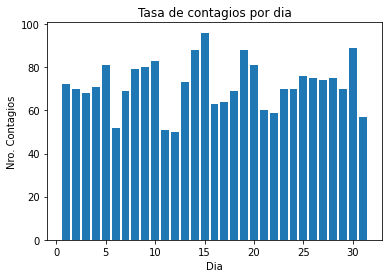

In [18]:
etiqueta =  list(contagiosaldia.keys())
valores = list(contagiosaldia.values())
plt.bar(etiqueta, valores, align="center")
plt.title("Tasa de contagios por dia")
plt.xlabel("Dia")
plt.ylabel("Nro. Contagios")
plt.show()